In [1]:
%load_ext autoreload
%autoreload 2

import tifffile
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import yaml
from attrdict import AttrDict
from models.tracker import Tracker
from tools.datasets import CellDataSet



In [2]:
def get_cells(image):
    cell_num = image.max()
    masks = [np.empty([0, 2]) for i in range(cell_num)]

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            cell_id = image[i][j]
            if cell_id != 0:
                masks[cell_id-1] = np.append(masks[cell_id-1], np.array([[i, j]]), axis=0)

    i = 0
    while i < len(masks):
        if len(masks[i]) < 3:
            del masks[i]
        else:
            i += 1

    cell_num = len(masks)

    mean = np.array([masks[i].mean(axis=0) for i in range(cell_num)])
    cov = np.array([np.cov(masks[i][:, 0], masks[i][:, 1]) for i in range(cell_num)])
    cell_scales = np.array([1.5*math.sqrt(np.linalg.eig(c)[0].max()) for c in cov])
    return mean, cell_scales


def load_segmented_data(data_path, data_type=np.uint16):
    means = []
    scales =[]
    images = []
    for path in data_path:
        image = tifffile.imread(path).astype(data_type)
        mean, scale = get_cells(image)
        images.append(image)
        means.append(mean)
        scales.append(scale)

    return means, scales, images

In [3]:
data_root = "C://Users/morim/Desktop/track_test_data/Fluo-N2DH-SIM+_train/Fluo-N2DH-SIM+/01_GT/SEG"
data_names = [f"man_seg0{i:02}.tif" for i in range(65)]

data_path = [os.path.join(data_root, name) for name in data_names]

means, scales, images = load_segmented_data(data_path)

21.304839214258386
21.467453637183787
26.262450950836048
23.291920835893606
22.14571653375237
24.287942255957894
21.796681119820576
21.02740204249119
21.39230692422851
23.591457124468015
24.284051258771964
23.800850459057425
21.760697912301712
20.838682965891856
22.992077368769905
21.05184036044146
22.364846271748142
24.02662004848545
26.1259453840517
23.119316376908735
23.468282163258273
22.76341124335795
24.986517173596937
23.560334772468224
20.048583654126823
20.785486408035855
24.999163860137582
24.371973581381088
20.850931591033234
24.900649427961735


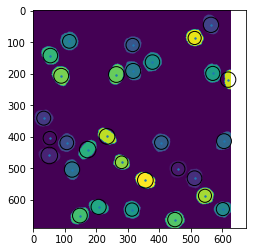

In [4]:

fig, ax = plt.subplots()
ax.imshow(images[2])
ax.scatter(means[2][:, 1], means[2][:, 0], s=2)
ax.set_aspect(1)
for s, m in zip(scales[2], means[2]):
    print(s)
    circle = patches.Circle((m[1], m[0]), s, fill=False)
    ax.add_patch(circle)



In [5]:
mean_max = max([m.max() for m in means])
mean_min = max([m.min() for m in means])
scales = [s / (mean_max - mean_min) for s in scales]
means = [(m - mean_min)/(mean_max - mean_min) for m in means]

In [6]:
with open("C:/Users/morim/PycharmProjects/GPCellTracker/config/tracker_default.yaml") as f:
    config = AttrDict(yaml.safe_load(f))
motion_estimation = lambda x: x
tracker = Tracker(CellDataSet(means, len(means)), motion_estimation, config)

In [14]:
from tools.datasets import Tracklet

tracklet_ = Tracklet(tracker.time_len)
tracker.init_tracklet(tracklet_)
tracker.match(tracklet_[-1], tracker.dataset[-2])

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-04
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 6637 rows, 10423 columns and 452925 nonzeros
Model fingerprint: 0xf4342807
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-07, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 6548 rows and 9821 columns
Presolve time: 0.89s
Presolved: 89 rows, 602 columns, 1202 nonzeros

Ordering time: 0.00s

Barrier statistics:
 Dense cols : 1
 AA' NZ     : 6.010e+02
 Factor NZ  : 1.765e+03
 Factor Ops : 3.949e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.12665153e+0

1

array([[ 0.65968944,  0.04219168],
       [ 0.72758428,  0.12427684],
       [ 0.26419573,  0.10386998],
       [ 0.84346   ,  0.75920603],
       [ 0.76128312,  0.47755342],
       [ 0.84644266,  0.57909194],
       [ 0.16963766,  0.47868605],
       [ 0.19257932,  0.57994081],
       [ 0.41278824,  0.09109352],
       [ 0.5078566 ,  0.26496292],
       [ 0.64229961,  0.20540567],
       [ 0.98598171,  0.09852215],
       [ 0.23150644,  0.71915676],
       [ 0.22191014,  0.83021645],
       [ 0.50694987,  0.04818098],
       [ 0.6514721 ,  0.37843528],
       [ 0.75746534,  0.33198943],
       [ 0.04571882,  0.33591872],
       [ 0.71557304,  0.57870074],
       [ 0.24100163, -0.05345213],
       [ 0.08448128, -0.04326166],
       [ 0.02040088,  0.69723737],
       [ 0.49361181,  0.50933598],
       [ 0.5307266 ,  0.62416335],
       [-0.04744448,  0.04955286],
       [-0.03032467,  0.79978046],
       [ 0.58504501,  0.80229138],
       [ 0.90824508,  0.6622718 ],
       [ 0.99207834,